# Polynomial Regression + Multi-layer Perceptron

## Goals

The notebook can be divided into three parts:

1. Polynomial Regression
This part aims to:
- Create Polynomial regression models with different degrees from degree 2 to degree 10. 
- Report train, validation and test errors of the models using Mean Squared Error.
- Choose the best Polynomial regression model with the least error.

2. Multi-layer Perceptron
This part aims to:
- Create Multi-layer Perceptron models with different hidden layers from 1 to 10. 
- Report train, validation and test errors of the models using Mean Squared Error.
- Choose the best Multi-layer Perceptron model with the least error.

3. Final test between Polynomial Regression vs Multi-layer Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression, HuberRegressor    # classes providing Linear Regression with ordinary squared error loss and Huber loss, respectively
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import train_test_split

### Importing and processing the dataset

In [2]:
# import the cleaned data file

df = pd.read_csv("data_cleaned.csv")

df

,city,date_count,postal_code,room,price
0,Helsinki,1,100,1,5458
1,Helsinki,1,100,2,5164
2,Helsinki,1,100,3,4944
3,Helsinki,1,120,1,5515
4,Helsinki,1,120,2,5349
...,...,...,...,...,...
7475,Espoo,48,2650,2,4564
7476,Espoo,48,2650,3,3929
7477,Kauniainen,48,2700,3,4824
7478,Espoo,48,2710,3,2782


In [3]:
"""
From the dataframe select specific properties as features and labels:
    1. Select "date_count", "postal_code", "room" as features X
    2. Select "price" as labels y
"""

X = df[["date_count", "postal_code", "room"]].to_numpy()
y = df["price"].to_numpy()

## sanity check the value of feature matrix and label vector
assert np.array_equal(X[0], [1, 100, 1]), "Feature matrix value is incorrect"
assert np.array_equal(y[0], 5458), "Label vector value is incorrect"

## sanity check the shape of feature matrix and label vector
assert X.shape == (7480, 3), "The shape of X is incorrect!"
assert y.shape == (7480,), "The shape of y is incorrect!"

### Splitting dataset into train/validation/test data

In [4]:
# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

After completing this step, three datasets are created:<br>
**X_train and y_train**<br>
**X_val and y_val**<br>
**X_test and y_test**<br>

They will be used in the model training/validation/testing below.

### Create the machine learning model - Polynomial Regression

A list of polynomial regression with different degrees (from 2 to 10) is used here.

In [5]:
# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_123 = np.array(tr_errors)
val_errors_123 = np.array(val_errors)

In [6]:
# print the training errors and validation errors for each polynomial degree

print("{:<10s}{:<20s}{:<20s}".format("Degree", "Training error", "Validation error"))
for i in range(len(degrees)):
    print("{:<10d}{:<20.2f}{:<20.2f}".format(degrees[i], tr_errors[i], val_errors[i]))

Degree    Training error      Validation error    
2         821490.50           846820.31           
3         637939.61           648206.25           
4         626373.99           635871.00           
5         95662280.85         96425132.21         
6         274930837.22        263704712.78        
7         294065621.26        333872433.94        
8         1704356375.41       1884669945.96       
9         1697826848.24       1869154814.75       
10        2006505754.96       2511204270.96       


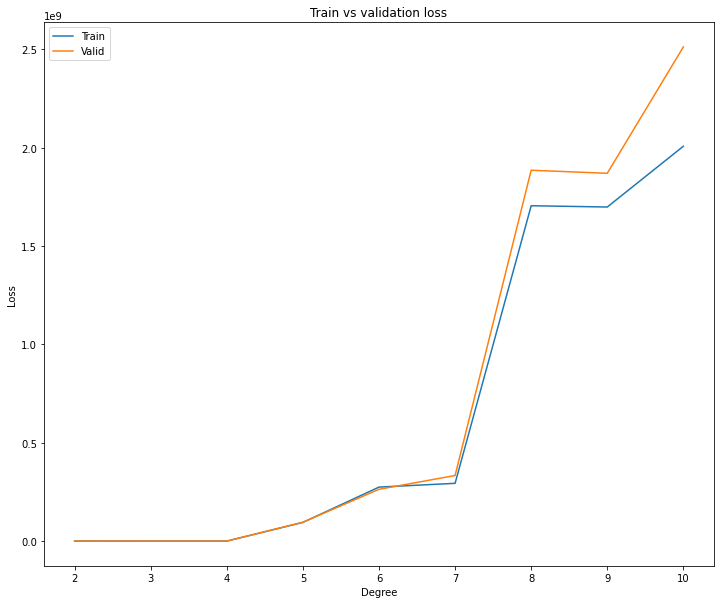

In [7]:
plt.figure(figsize=(12, 10))

plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

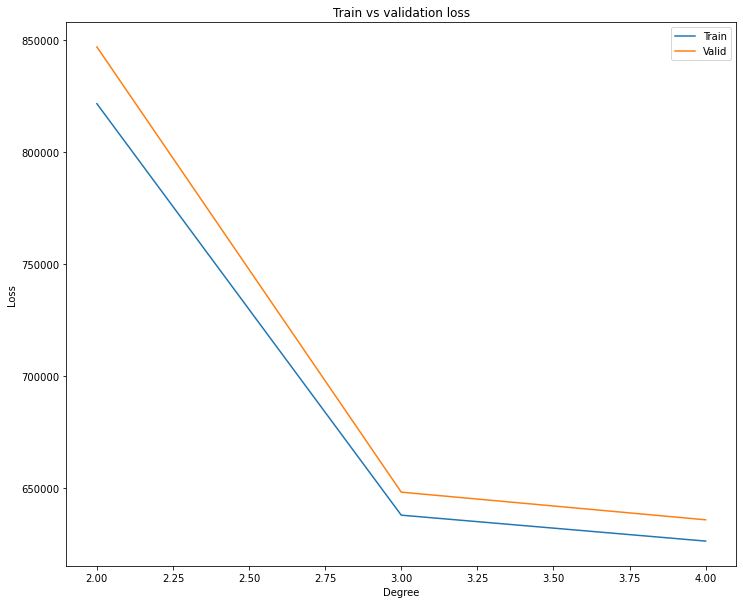

In [8]:
plt.figure(figsize=(12, 10))

plt.plot(degrees[0:3], tr_errors[0:3], label = 'Train')
plt.plot(degrees[0:3], val_errors[0:3],label = 'Valid')
plt.legend(loc = 'upper right')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

According to the training-validation error, I can see that a polynomial regression model with degree 4 is the best model out of our list.

The models also show a stable performance. No overfitting or underfitting is visible.

I also notice that the MSE is high compared to the errors in the assignment. I believe that it is not a huge problem since my features and labels take large values (`price`, `postal_code` are thousands).

However, I feel uncertain about the high errors, and I don't know if they relate to the using of all three features or not. Therefore, in the cells below, I also created polynomial regression models of the same degree, first with 2 out of 3 features, and then with 1 out of 3 features.

### Obtaining final test error
As we can see, due to the validation error the best Polynomial model is with degree of 4. After that, the final error on test set is calculated for the best model.

The comparision between different feature selection below showed that a polynomial with degree of 4 using all 3 features is the best model. Due to the fact that the cells below create feature X and label y all over again, and performing the test at the end of this notebook will be wrong due to wrong feature vector X. Therefore, I need to perform the final test for the model in this cell.

In [9]:
lin_regr = LinearRegression(fit_intercept=False)
 
poly = PolynomialFeatures(degree=4)    # generate polynomial features with degree of 4
X_train_poly = poly.fit_transform(X_train)    # fit the raw features
lin_regr.fit(X_train_poly, y_train)    # apply linear regression to these new features and labels

X_test_poly = poly.fit_transform(X_test)
y_pred_test = lin_regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)

print("The test error Polynomial model with degree of 4 is: ", test_error)

The test error Polynomial model with degree of 4 is:  648508.7667515123


### Create the machine learning model - Multi-layer Perceptron

**Hypothesis Space used in this task - MLP Structure:**
- one input layer consists of the individual features (3 features) and is the entry point to the MLP.
- several hidden layers with 15 neuron units in each layer and [ReLU activation function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), we will explore the number of hidden layers in this task, find out the ideal number of hidden layers for this given ML problem.

- one final output layer with 1 neuron unit.

For regularization strength and learning rate, default values are used.

**Loss used in this task**: MSE

In [27]:
from sklearn.neural_network import MLPRegressor

## define a list of values for the number of hidden layers
num_layers = [1,2,3,4,5,6,7,8,9,10]    # number of hidden layers ,6,7,8,9,10
num_neurons = 100  # number of neurons in each layer


# we will use this variable to store the resulting training errors corresponding to different hidden-layer numbers
mlp_tr_errors = []          
mlp_val_errors = []

for i, num in enumerate(num_layers):
    hidden_layer_sizes = tuple([num_neurons]*num) # size (num of neurons) of each layer stacked in a tuple
    
    mlp_regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, random_state=42, max_iter=1000)
    mlp_regr.fit(X_train, y_train)
    
    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_regr.predict(X_train)    # predict on the training set
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    y_pred_val = mlp_regr.predict(X_val) # predict values for the validation data 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
    
    # sanity check num of layers
    assert mlp_regr.n_layers_ == num_layers[i]+2 # total layers = num of hidden layers + input layer + output layer
    
    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

# sanity check the length of array mlp_tr_errors
assert len(mlp_tr_errors) == len(mlp_val_errors) == len(num_layers)

C:\Users\tamqu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


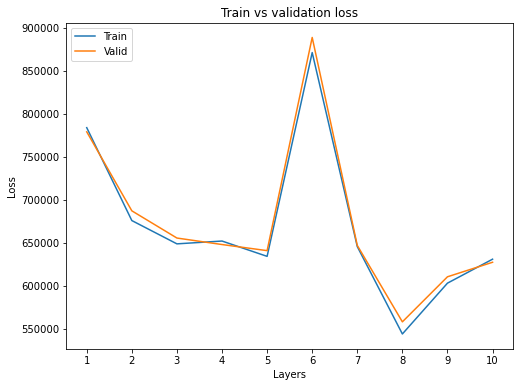

In [28]:
plt.figure(figsize=(8, 6))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Valid')
plt.xticks(num_layers)
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [30]:
errors = {"num_hidden_layers":num_layers,
          "mlp_train_errors":mlp_tr_errors,
          "mlp_val_errors":mlp_val_errors,
         }
pd.DataFrame(errors)

,num_hidden_layers,mlp_train_errors,mlp_val_errors
0,1,783709.228486,778879.938477
1,2,675708.633119,687020.648723
2,3,648616.804349,655383.783239
3,4,651891.223151,647830.917225
4,5,634082.336058,640730.143832
5,6,871032.438824,888600.621500
6,7,645441.012560,646792.438227
7,8,543834.376222,557949.571622
8,9,602928.824013,610327.959949
9,10,630796.308765,627205.415992


In [31]:
from sklearn.neural_network import MLPRegressor

## define a list of values for the number of hidden layers
num_layers = [1,2,3,4,5,6,7,8,9,10]    # number of hidden layers ,6,7,8,9,10
num_neurons = 15  # number of neurons in each layer


# we will use this variable to store the resulting training errors corresponding to different hidden-layer numbers
mlp_tr_errors = []          
mlp_val_errors = []

for i, num in enumerate(num_layers):
    hidden_layer_sizes = tuple([num_neurons]*num) # size (num of neurons) of each layer stacked in a tuple
    
    mlp_regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, random_state=42, max_iter=1000)
    mlp_regr.fit(X_train, y_train)
    
    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_regr.predict(X_train)    # predict on the training set
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    y_pred_val = mlp_regr.predict(X_val) # predict values for the validation data 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
    
    # sanity check num of layers
    assert mlp_regr.n_layers_ == num_layers[i]+2 # total layers = num of hidden layers + input layer + output layer
    
    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

# sanity check the length of array mlp_tr_errors
assert len(mlp_tr_errors) == len(mlp_val_errors) == len(num_layers)

C:\Users\tamqu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


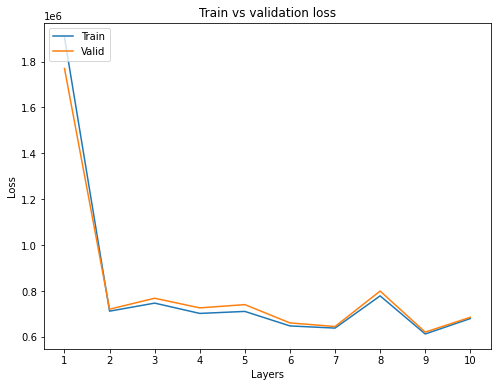

In [32]:
plt.figure(figsize=(8, 6))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Valid')
plt.xticks(num_layers)
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [33]:
errors = {"num_hidden_layers":num_layers,
          "mlp_train_errors":mlp_tr_errors,
          "mlp_val_errors":mlp_val_errors,
         }
pd.DataFrame(errors)

,num_hidden_layers,mlp_train_errors,mlp_val_errors
0,1,1.905185e+06,1.769802e+06
1,2,7.118489e+05,7.204611e+05
2,3,7.469166e+05,7.681668e+05
3,4,7.019826e+05,7.261623e+05
4,5,7.107314e+05,7.403592e+05
5,6,6.474655e+05,6.606335e+05
6,7,6.380508e+05,6.449309e+05
7,8,7.785555e+05,7.994062e+05
8,9,6.123873e+05,6.205190e+05
9,10,6.795146e+05,6.851371e+05


In [37]:
layers = [(20), (40, 20), (45, 30, 15)]

# we will use this variable to store the resulting training errors corresponding to different hidden-layer numbers
mlp_tr_errors = []          
mlp_val_errors = []

for layer in layers:
    hidden_layer_sizes = layer # size (num of neurons) of each layer stacked in a tuple
    
    mlp_regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, random_state=42, max_iter=1000)
    mlp_regr.fit(X_train, y_train)
    
    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_regr.predict(X_train)    # predict on the training set
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    y_pred_val = mlp_regr.predict(X_val) # predict values for the validation data 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error

    
    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

C:\Users\tamqu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


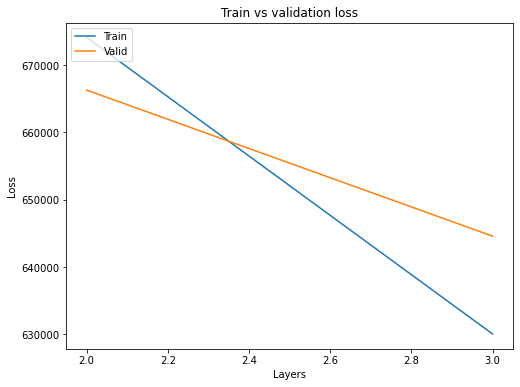

In [45]:
plt.figure(figsize=(8, 6))

plt.plot((2,3), mlp_tr_errors[1:], label = 'Train')
plt.plot((2,3), mlp_val_errors[1:],label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [46]:
errors = {
          "mlp_train_errors":mlp_tr_errors,
          "mlp_val_errors":mlp_val_errors,
         }
pd.DataFrame(errors)

,mlp_train_errors,mlp_val_errors
0,2.056387e+06,1.923254e+06
1,6.741182e+05,6.662941e+05
2,6.300657e+05,6.446017e+05


### Create polynomial regression with 2 out of 3 features (Optional, to compare result)

In [10]:
X = df[["date_count", "postal_code"]].to_numpy()
y = df["price"].to_numpy()

# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_12 = np.array(tr_errors)
val_errors_12 = np.array(val_errors)

In [11]:
X = df[["date_count", "room"]].to_numpy()
y = df["price"].to_numpy()

# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_13 = np.array(tr_errors)
val_errors_13 = np.array(val_errors)

In [12]:
X = df[["postal_code", "room"]].to_numpy()
y = df["price"].to_numpy()

# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_23 = np.array(tr_errors)
val_errors_23 = np.array(val_errors)

### Create polynomial regression with 1 out of 3 features 

In [13]:
X = df[["date_count"]].to_numpy()
y = df["price"].to_numpy()

# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_1 = np.array(tr_errors)
val_errors_1 = np.array(val_errors)

In [14]:
X = df[["postal_code"]].to_numpy()
y = df["price"].to_numpy()

# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_2 = np.array(tr_errors)
val_errors_2 = np.array(val_errors)

In [15]:
X = df[["room"]].to_numpy()
y = df["price"].to_numpy()

# Split dataset with ratio 60-20-20 for test-validation-training respectively

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)

# Sanity check the percentage of the remaining data up to 1%
assert np.isclose(0.4, X_rem.shape[0] / X.shape[0], atol=0.01)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Sanity check the percentage of the remainig data up to 1%
assert np.isclose(0.5, X_test.shape[0] / X_rem.shape[0], atol=0.01)

# define a list of degrees for the polynomial
# degree: from 2 to 10

degrees = np.arange(2, 11).tolist()

# we will use this variable to store the resulting training and validation errors for each polynomial degree
tr_errors, val_errors = [], []

for i, degree in enumerate(degrees):
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
# sanity check the length of array tr_errors
assert len(tr_errors) == len(val_errors) == len(degrees)

# store the traing-validation errors to numpy array to compare with other models later
tr_errors_3 = np.array(tr_errors)
val_errors_3 = np.array(val_errors)

Create a graph to visualize how using different features affect the training-validation MSE.

In [16]:
# [tr_errors_123, tr_errors_12, tr_errors_13, tr_errors_23, tr_errors_1, tr_errors_2, tr_errors_3]

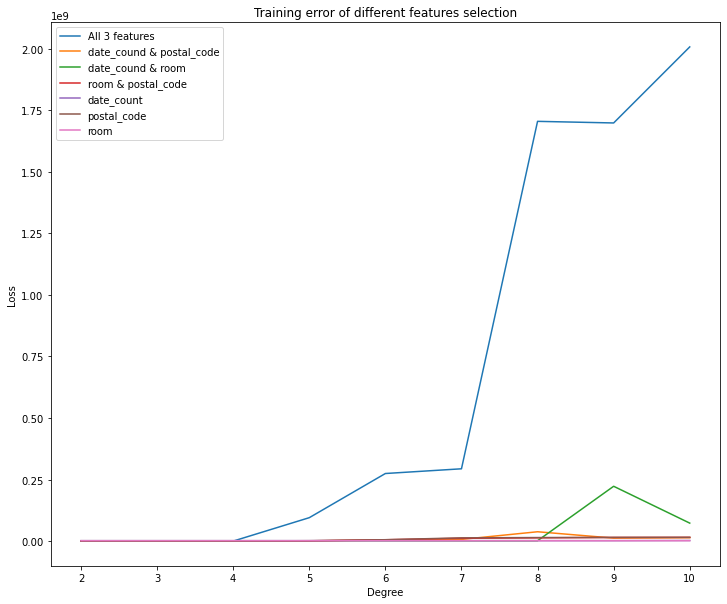

In [17]:
# first, we plot the training errors of all degree from 2 to 10

plt.figure(figsize=(12, 10))

plt.plot(degrees, tr_errors_123, label = 'All 3 features')
plt.plot(degrees, tr_errors_12,label = 'date_cound & postal_code')
plt.plot(degrees, tr_errors_13,label = 'date_cound & room')
plt.plot(degrees, tr_errors_23,label = 'room & postal_code')
plt.plot(degrees, tr_errors_1,label = 'date_count')
plt.plot(degrees, tr_errors_2,label = 'postal_code')
plt.plot(degrees, tr_errors_3,label = 'room')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Training error of different features selection')
plt.show()

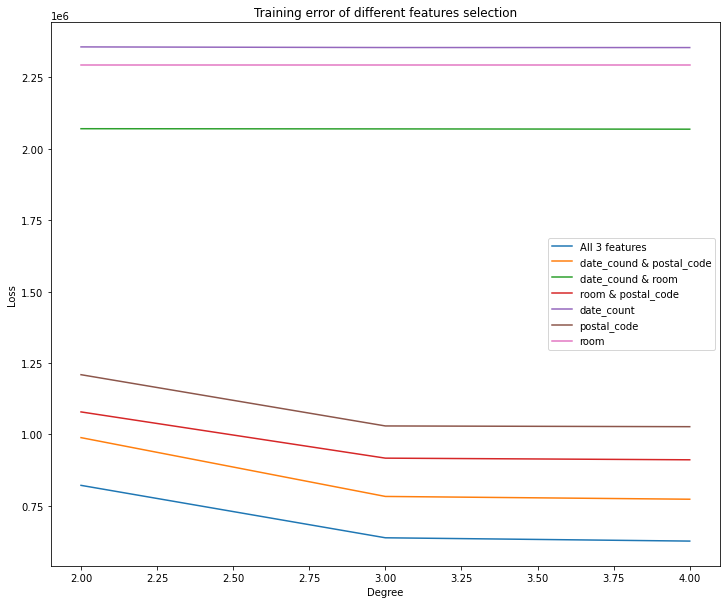

In [18]:
# we can see that the degree from 2 to 4 is still the regions where the errors are the least
# therefore, we zoom in our graph to the region degree 2, 3, 4

plt.figure(figsize=(12, 10))

plt.plot(degrees[0:3], tr_errors_123[0:3], label = 'All 3 features')
plt.plot(degrees[0:3], tr_errors_12[0:3],label = 'date_cound & postal_code')
plt.plot(degrees[0:3], tr_errors_13[0:3],label = 'date_cound & room')
plt.plot(degrees[0:3], tr_errors_23[0:3],label = 'room & postal_code')
plt.plot(degrees[0:3], tr_errors_1[0:3],label = 'date_count')
plt.plot(degrees[0:3], tr_errors_2[0:3],label = 'postal_code')
plt.plot(degrees[0:3], tr_errors_3[0:3],label = 'room')
plt.legend(loc = 'center right')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Training error of different features selection')
plt.show()

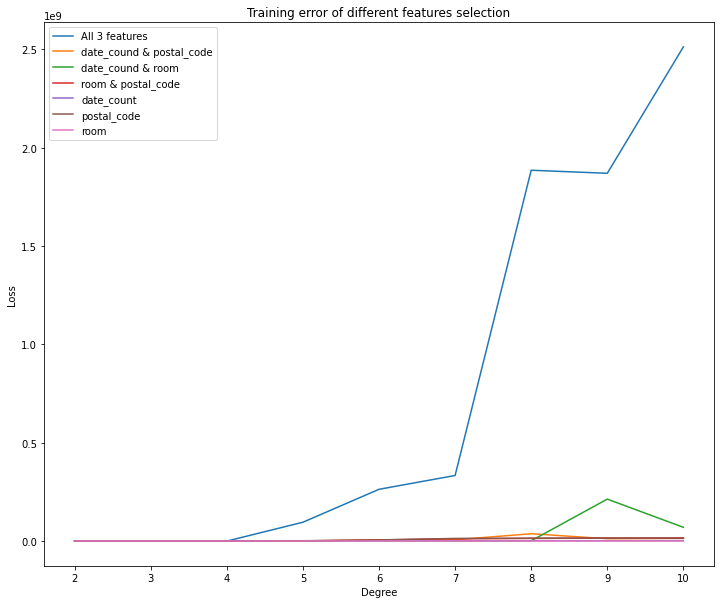

In [19]:
# Similarly, we plot the validation errors of all degree from 2 to 10

plt.figure(figsize=(12, 10))

plt.plot(degrees, val_errors_123, label = 'All 3 features')
plt.plot(degrees, val_errors_12,label = 'date_cound & postal_code')
plt.plot(degrees, val_errors_13,label = 'date_cound & room')
plt.plot(degrees, val_errors_23,label = 'room & postal_code')
plt.plot(degrees, val_errors_1,label = 'date_count')
plt.plot(degrees, val_errors_2,label = 'postal_code')
plt.plot(degrees, val_errors_3,label = 'room')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Training error of different features selection')
plt.show()

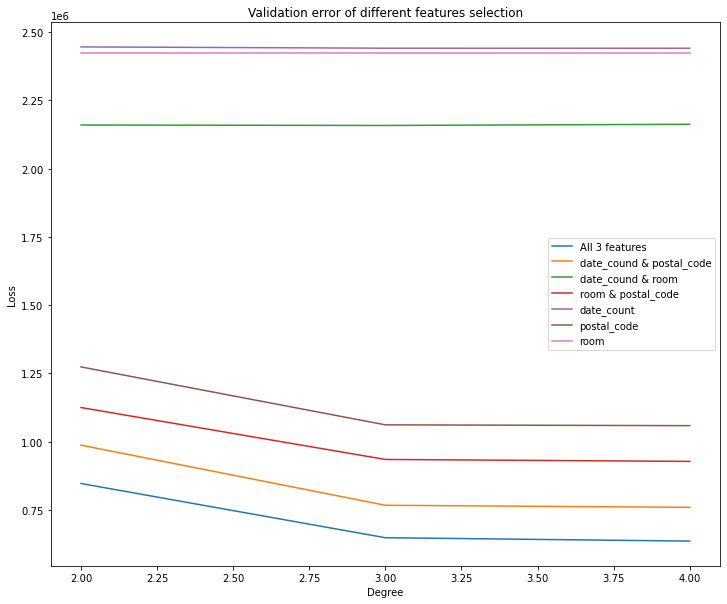

In [20]:
# we can see that the degree from 2 to 4 is still the regions where the errors are the least
# therefore, we zoom in our graph to the region degree 2, 3, 4

plt.figure(figsize=(12, 10))

plt.plot(degrees[0:3], val_errors_123[0:3], label = 'All 3 features')
plt.plot(degrees[0:3], val_errors_12[0:3],label = 'date_cound & postal_code')
plt.plot(degrees[0:3], val_errors_13[0:3],label = 'date_cound & room')
plt.plot(degrees[0:3], val_errors_23[0:3],label = 'room & postal_code')
plt.plot(degrees[0:3], val_errors_1[0:3],label = 'date_count')
plt.plot(degrees[0:3], val_errors_2[0:3],label = 'postal_code')
plt.plot(degrees[0:3], val_errors_3[0:3],label = 'room')
plt.legend(loc = 'center right')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Validation error of different features selection')
plt.show()